# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import the necessary libraries and module
import pandas as pd
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load the twitter-archive-enhanced.csv file into dataframe
tweet_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [15]:
#display the tweet_archive dataframe
tweet_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [16]:
#programmatically downloading the tweet_image_prediction.tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving the file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
#load image_predictions.tsv file into dataframe using the \t as sep argument
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

#display dataframe
image_predictions_df.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [18]:
# preparing handler for the tweepy api
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
             

api = tweepy.API(auth, wait_on_rate_limit=True)


In [4]:
#open a new terminal from the workspace tree and install tweepy to get the additional data
#get the tweet_ids from WeRateDogs Twitter archive and use the tweet ids to query the Twitter API 

tweety_ids = tweet_archive_df.tweet_id.values
len(tweety_ids)


2356

In [22]:
#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count_no holds number of iterations
# failed_ids keeps a list of tweet_ids which record weren't gotten
failed_tweet_ids = {}
count_no = 0

begin = timer()
# Save each tweet as a new line in tweet_json.txt file
with open('tweet_json.txt', 'w') as file:
    for tweety_id in tweety_ids:
        count_no += 1
        print(str(count_no) + ": " + str(tweety_id))
        try:
            tweet = api.get_status(tweety_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepyException as e:
            #tweepy.errors.TweepyException is available as tweepy.TweepyException for exceptions.
            print("Fail")
            failed_tweet_ids[tweety_id] = e
            pass
end = timer() 
#print the time taken to write tweet_json.txt
print(end - begin)
print(failed_tweet_ids)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
#Read the created json text file into a dataframe
#create an empty list to collect the retweet count and favorite count
retweet_list = []
filepath = 'tweet_json.txt'
with open(filepath) as file:
    #read text file
    for line in file:
        #convert each line of file to json format and get needed values
        line = json.loads(line)
        tweet_id = line.get('id')
        retweet_count = line.get('retweet_count')
        favorite_count = line.get('favorite_count')
        #append tweet id, retweet count and favorite count to list
        retweet_list.append({"id": tweet_id,
                             "retweet_count": retweet_count,
                             "favorite_count": favorite_count})
#print(retweet_list)
#convert list to dataframe
retweet_count = pd.DataFrame(retweet_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [5]:
retweet_count.head(7)

,id,retweet_count,favorite_count
0,892420643555336193,7003,33810
1,892177421306343426,5301,29325
2,891815181378084864,3478,22045
3,891689557279858688,7225,36930
4,891327558926688256,7757,35308
5,891087950875897856,2600,17806
6,890971913173991426,1661,10359


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing Tweeter archive

In [17]:
#access the tweet archive dataframe
tweet_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
tweet_archive_df.head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [23]:
tweet_archive_df.tail(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [27]:
tweet_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/747103485...,11,10,None,None,None,None,None


In [28]:
#displaying the statistical summary of the dataframe
tweet_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
#check if there is any null values for tweet_id
tweet_archive_df[tweet_archive_df['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
# check if there is any null values for name
tweet_archive_df[tweet_archive_df['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
#check if there is a tweet_id
tweet_archive_df[tweet_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
# check expanded_urls column for null values
tweet_archive_df[tweet_archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [36]:
#check if any name starts with a number
tweet_archive_df.name.sort_values().head(7)

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
1934    Aiden
77        Aja
Name: name, dtype: object

In [42]:
#check if any name isn't right
tweet_archive_df.name.sort_values().tail(50)

2204              an
2349              an
2335              an
1025              an
1362              an
759               an
1724              by
1435         getting
1071         getting
992              his
542       incredibly
1259     infuriating
1457            just
2019            just
822             just
1063            just
1916            life
2001           light
1095             mad
682              mad
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346             the
1603             the
2037             the
2212             the
1815             the
1797             the
1527             the
1120            this
1121    unacceptable
1031            very
773             very
1097         

In [68]:
tweet_archive_df.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [70]:
tweet_archive_df.rating_numerator.value_counts().head(30)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
2        9
1        9
75       2
15       2
420      2
0        2
80       1
144      1
17       1
26       1
20       1
121      1
143      1
44       1
60       1
45       1
50       1
99       1
Name: rating_numerator, dtype: int64

In [20]:
tweet_archive_clean.query('rating_numerator > 16')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,17,10,none,none,none,none,none
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,420,10,none,none,none,none,none
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,666,10,none,none,none,none,none
290,838150277551247360,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,182,10,none,none,none,none,none
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,none,none,none,none,none
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",75,10,logan,none,none,none,none
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,none,none,none,none,none
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,sam,none,none,none,none
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,logan,none,none,none,none
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,sophie,none,none,pupper,none


In [71]:
tweet_archive_df.rating_denominator.value_counts().head(30)

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
tweet_archive_clean.query('rating_denominator > 10')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,none,none,none,none,none
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,none,none,none,none,none
784,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",9,11,none,none,none,none,none
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,none,none,none,none,none
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",9,11,none,none,none,none,none
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,none,none,none,none,none
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,4,20,none,none,none,none,none
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,bluebert,none,none,none,none
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,none,none,none,none,none
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,none,none,none,none,none


#### Assessing image predictions dataframe

In [43]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [44]:
image_predictions_df.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [47]:
image_predictions_df.tail(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [48]:
image_predictions_df.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True


In [50]:
#displaying the statiscal summary of the dataframe
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
#check for null values in tweet_id
image_predictions_df[image_predictions_df['tweet_id'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [53]:
#check for duplicate tweet id
image_predictions_df[image_predictions_df['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [56]:
#display unique values and look for repetitions due to character case
image_predictions_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [41]:
image_predictions_df.p1.sort_values()

1561         Afghan_hound
1855         Afghan_hound
1458         Afghan_hound
1804         Afghan_hound
446     African_crocodile
              ...        
253           wood_rabbit
1831         wooden_spoon
932                  wool
246                  wool
297                 zebra
Name: p1, Length: 2075, dtype: object

In [39]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [40]:
image_predictions_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

#### Assessing retweet count dataframe

In [60]:
retweet_count

,id,retweet_count,favorite_count
0,892420643555336193,7003,33810
1,892177421306343426,5301,29325
2,891815181378084864,3478,22045
3,891689557279858688,7225,36930
4,891327558926688256,7757,35308
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [61]:
retweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [62]:
retweet_count.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.268156,7053.049420
std,6.820795e+16,4183.405913,10960.362376
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.000000,1224.500000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8603.500000
max,8.924206e+17,70709.000000,144849.000000


In [64]:
retweet_count.sample(7)

,id,retweet_count,favorite_count
298,835172783151792128,5301,24605
2182,668614819948453888,272,545
532,804475857670639616,1892,5846
1918,673700254269775872,501,1282
872,758828659922702336,3557,10489
1195,714251586676113411,762,3031
2141,669351434509529089,157,381


In [65]:
retweet_count.tail(7)

,id,retweet_count,favorite_count
2320,666051853826850816,704,1027
2321,666050758794694657,50,115
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,422,2292


In [66]:
retweet_count[retweet_count['id'].duplicated()]

,id,retweet_count,favorite_count


### Quality issues

#### Tweet archive dataframe
1. missing/NaN values for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

2. some columns don't matter. Example: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id

3. incorrect datatype for timestamp

4. inconsistency in name values character case

5. Wrong/incorrect values like a, the, very, an, this, just,... in name column

6. missing data in expanded_urls column

7. Error values on dog rating

#### Image predictions

8. Some records with predictions are not dogs

9. inconsistency in p1, p2 and p3 character case value (should be lower case)

#### Rtweet count

10. rename id column to tweet_id

### Tidiness issues
#### Tweet archive dataframe
1. rating_numerator and rating_denominator should be merged as one column

#### Finally

2. merge the tables for a better structure
 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
tweet_archive_clean = tweet_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
retweet_count_clean = retweet_count.copy()

### Issue #1:  missing/NaN values for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

#### Define:
        Drop the NaN values from the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

#### Code

In [8]:
tweet_archive_clean.in_reply_to_status_id.dropna()
tweet_archive_clean.in_reply_to_user_id.dropna()
tweet_archive_clean.retweeted_status_id.dropna()
tweet_archive_clean.retweeted_status_user_id.dropna()
tweet_archive_clean.retweeted_status_timestamp.dropna()

19      2017-07-19 00:47:34 +0000
32      2017-07-15 02:44:07 +0000
36      2017-02-12 01:04:29 +0000
68      2017-06-23 01:10:23 +0000
73      2017-06-23 16:00:04 +0000
                  ...            
1023    2015-11-21 00:46:50 +0000
1043    2015-11-19 00:32:12 +0000
1242    2016-03-21 19:29:52 +0000
2259    2015-11-20 03:43:06 +0000
2260    2015-11-20 03:41:59 +0000
Name: retweeted_status_timestamp, Length: 181, dtype: object

#### Test

In [9]:
tweet_archive_clean.retweeted_status_timestamp.value_counts()

2017-07-19 00:47:34 +0000    1
2015-11-28 03:31:48 +0000    1
2015-11-19 03:29:07 +0000    1
2015-11-16 04:02:55 +0000    1
2016-09-02 18:03:10 +0000    1
                            ..
2016-11-06 01:33:58 +0000    1
2016-10-06 15:49:14 +0000    1
2017-01-20 00:50:15 +0000    1
2017-01-20 17:00:46 +0000    1
2015-11-20 03:41:59 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [10]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

What I observe is dropping the NaN or missing values in a column doesn't take effect, rather i will have to drop the complete row for the drop to take effect. Dropping the rows might affect our visualization analysis as this will require dropping most of the rows of our dataset. Since the affected columns registered in issue 1 aren't needed at all, dropping the columns will be a better choice

### Issue #2: Some columns don't matter. Example: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id

#### Define
    Drop the following columns from the tweet_archive_clean dataframe

#### Code

In [11]:
tweet_archive_clean = tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


#### Test

In [10]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #3: incorrect datatype for timestamp

#### Define
    change timestamp column datatype to datetime

#### Code

In [12]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

#### Test

In [12]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4: inconsistency in name values character case

#### Define
    Convert all values in name, doggo, floofer, pupper and puppo column to lower case for consistency

#### Code

In [13]:
tweet_archive_clean.name=tweet_archive_clean.name.str.lower()
tweet_archive_clean.doggo=tweet_archive_clean.doggo.str.lower()
tweet_archive_clean.floofer=tweet_archive_clean.floofer.str.lower()
tweet_archive_clean.pupper=tweet_archive_clean.pupper.str.lower()
tweet_archive_clean.puppo=tweet_archive_clean.puppo.str.lower()

#### Test

In [14]:
tweet_archive_clean.name.value_counts()

none          745
a              55
charlie        12
cooper         11
lucy           11
             ... 
dex             1
ace             1
tayzie          1
grizzie         1
christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
tweet_archive_clean.doggo.value_counts()

none     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
tweet_archive_clean.floofer.value_counts()

none       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
tweet_archive_clean.pupper.value_counts()

none      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
tweet_archive_clean.puppo.value_counts()

none     2326
puppo      30
Name: puppo, dtype: int64

### Issue #5: Wrong/incorrect values like a, the, very, an, this, just,... in name column

#### Define
    create a list of the following values: an, an, all, bo, by, his, just, my, not, such, the, this and very. And replace them  with none in name column

#### Code

In [106]:
tweet_archive_clean.name.sort_values().sample(50)

9          cassie
1223       thumas
2155         none
288       stanley
1238         none
266           ken
921          none
2340         none
2313        lugan
1415        rusty
2227         none
11          bruno
1876       oliver
1725        emmie
772          huck
1755          tug
391          none
1744        rubio
1053         none
1414      cuddles
545          duke
2025       batdog
2297         dave
798          none
249       pickles
631         laika
407       winston
114          cody
1694        sarge
2132        fabio
915         devón
71         snoopy
736          none
1954       albert
298          none
1762        grizz
1539         luca
383       charlie
1511         none
1608         otis
973          none
326       charlie
2037          the
833        nollie
1821       vinnie
1430          ole
799     roosevelt
513          none
1261         lacy
1023       shaggy
Name: name, dtype: object

In [14]:
error_values = (["an", "a", "all", "bo", "by", "his", "just", "my", "not", "such", "the", "this", "very"])
for value in error_values:
    tweet_archive_clean.name.replace(value, "none", inplace = True)

#### Test

In [128]:
tweet_archive_clean.name.sort_values

<bound method Series.sort_values of 0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351        none
2352        none
2353        none
2354        none
2355        none
Name: name, Length: 2356, dtype: object>

### Issue #6: missing data in expanded_urls column

#### Define
    Drop the missing rows in the expanded url column but this might affect our dataset as this column isn't important. So we drop the expanded url column instead of a row

#### Code

In [15]:
tweet_archive_clean = tweet_archive_clean.drop("expanded_urls", axis=1)

#### Test

In [18]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


### Issue #7: Error values on dog rating

#### Define
    Display error values using value index and change the error values to the right values

#### Code

In [16]:
#display rating values with error using the iloc function
tweet_archive_clean.iloc[[188,189,290,313,340,342,433,516,695,784,902,979,1068,1120,1165,1202,1228,1254,1274,1351,1433,1598,1634,1635,1662,1663,1779,1843,2074], [3,4,5,6]]


,text,rating_numerator,rating_denominator,name
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,none
189,@s8n You tried very hard to portray this good ...,666,10,none
290,@markhoppus 182/10,182,10,none
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,none
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,logan
342,@docmisterio account started on 11/15/15,11,15,none
433,The floofs have been released I repeat the flo...,84,70,none
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,sam
695,"This is Logan, the Chow who lived. He solemnly...",75,10,logan
784,"RT @dog_rates: After so many requests, this is...",9,11,none


In [17]:
#20 was mistaken for 420
tweet_archive_clean.iloc[188, 4] = 20

#16 was mistaken for 666
tweet_archive_clean.iloc[189, 4] = 16

#18 was mistaken for 182
tweet_archive_clean.iloc[290, 4] = 18

#16 was mistaken for 960 and 10 for 0
tweet_archive_clean.iloc[313, 4] = 16
tweet_archive_clean.iloc[313, 5] = 10

#15 was mistaken for 75
tweet_archive_clean.iloc[340, 4] = 15

#14 was mistaken for 84 and 10 for 70
tweet_archive_clean.iloc[342, 5] = 10

#14 was mistaken for 84 and 10 for 70
tweet_archive_clean.iloc[433, 4] = 14
tweet_archive_clean.iloc[433, 5] = 10

#10 was mistakenly written as 7
tweet_archive_clean.iloc[516, 5] = 10

#15 was mistakenly written as 75
tweet_archive_clean.iloc[695, 4] = 15

#10 was mistakenly written as 11
tweet_archive_clean.iloc[784, 5] = 10

#165/150 to the lowest term gives 11/10
tweet_archive_clean.iloc[902, 4] = 11
tweet_archive_clean.iloc[902, 5] = 10

#16 was mistakenly written as 1776
tweet_archive_clean.iloc[979, 4] = 16

#10 was mistakenly written as 11
tweet_archive_clean.iloc[1068, 5] = 10

#change 204 and 170 to 0
tweet_archive_clean.iloc[1120, 4] = 0
tweet_archive_clean.iloc[1120, 5] = 0

#change 4 and 20 to 0
tweet_archive_clean.iloc[1165, 4] = 0
tweet_archive_clean.iloc[1165, 5] = 0

#50/50 change to 10/10
tweet_archive_clean.iloc[1202, 4] = 10
tweet_archive_clean.iloc[1202, 5] = 10

#99/90 to the lowest term gives 11/10
tweet_archive_clean.iloc[1228, 4] = 11
tweet_archive_clean.iloc[1228, 5] = 10

#80/80 to the lowest term gives 10/10
tweet_archive_clean.iloc[1254, 4] = 10
tweet_archive_clean.iloc[1254, 5] = 10

#45/50 to the lowest term gives 9/10
tweet_archive_clean.iloc[1274, 4] = 9
tweet_archive_clean.iloc[1274, 5] = 10

#60/50 to the lowest term gives 12/10
tweet_archive_clean.iloc[1351, 4] = 12
tweet_archive_clean.iloc[1351, 5] = 10

#44/40 to the lowest term gives 11/10
tweet_archive_clean.iloc[1433, 4] = 11
tweet_archive_clean.iloc[1433, 5] = 10

#change 4 and 20 to 0
tweet_archive_clean.iloc[1598, 4] = 0
tweet_archive_clean.iloc[1598, 5] = 0

#143/130 to the lowest term gives 11/10
tweet_archive_clean.iloc[1634, 4] = 11
tweet_archive_clean.iloc[1634, 5] = 10

#121/110 to the lowest term gives 11/10
tweet_archive_clean.iloc[1635, 4] = 11
tweet_archive_clean.iloc[1635, 5] = 10

#change 7 and 11 to 0
tweet_archive_clean.iloc[1662, 4] = 0
tweet_archive_clean.iloc[1662, 5] = 0

#10 was mistaken for 16
tweet_archive_clean.iloc[1663, 5] = 10

#144/120 to the lowest term gives 12/10
tweet_archive_clean.iloc[1779, 4] = 12
tweet_archive_clean.iloc[1779, 5] = 10

#88/80 to the lowest term gives 11/10
tweet_archive_clean.iloc[1843, 4] = 11
tweet_archive_clean.iloc[1843, 5] = 10

#20 was mistaken for 420
tweet_archive_clean.iloc[2074, 4] = 20

#### Test

In [111]:
tweet_archive_clean.iloc[[188,189,290,313,340,342,433,516,695,784,902,979,1068,1120,1165,1202,1228,1254,1274,1351,1433,1598,1634,1635,1662,1663,1779,1843,2074], [3,4,5,6]]

,text,rating_numerator,rating_denominator,name
188,@dhmontgomery We also gave snoop dogg a 420/10...,20,10,none
189,@s8n You tried very hard to portray this good ...,16,10,none
290,@markhoppus 182/10,18,10,none
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,16,10,none
340,"RT @dog_rates: This is Logan, the Chow who liv...",15,10,logan
342,@docmisterio account started on 11/15/15,11,10,none
433,The floofs have been released I repeat the flo...,14,10,none
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,10,sam
695,"This is Logan, the Chow who lived. He solemnly...",15,10,logan
784,"RT @dog_rates: After so many requests, this is...",9,10,none


### Issue #8: Some records with predictions are not dogs

#### Define
    Drop record predictions (with false values in p1_dog, p2_dog and p3_dog columns) that are not dogs

#### Code

In [44]:
image_predictions_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [18]:
#Droping rows with False values on p1_dog, p2_dog and p3_dog columns
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean['p1_dog'] == False].index, inplace = True)
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean['p2_dog'] == False].index, inplace = True)
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean['p3_dog'] == False].index, inplace = True)


#### Test

In [35]:
image_predictions_clean[image_predictions_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
image_predictions_clean[image_predictions_clean.p2_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
image_predictions_clean[image_predictions_clean.p3_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9: inconsistency in p1, p2 and p3 character case value (should be lower case)

#### Define
    Convert the values of the p1, p2 and p3 to lower case values using str.lower()

#### Code

In [19]:
#changing p1 column values to lower case
image_predictions_clean['p1'] = image_predictions_clean.p1.str.lower()

In [20]:
#changing p1 column values to lower case
image_predictions_clean['p2'] = image_predictions_clean.p2.str.lower()

In [21]:
#changing p1 column values to lower case
image_predictions_clean['p3'] = image_predictions_clean.p2.str.lower()

#### Test

In [133]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,chihuahua,0.438054,True,kelpie,0.149706,True,kelpie,0.096480,True
1543,791406955684368384,https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg,4,pembroke,0.972629,True,cardigan,0.027026,True,cardigan,0.000153,True
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,chihuahua,0.368876,True,pomeranian,0.282102,True,pomeranian,0.178795,True
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,greater_swiss_mountain_dog,0.519428,True,boxer,0.121500,True,boxer,0.114498,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,standard_poodle,0.157081,True


### Issue #10: rename id column to tweet_id

#### Define
    use the rename function to change id to tweet_id

#### Code

In [22]:
retweet_count_clean.rename(columns={"id" : "tweet_id"}, inplace = True)

#### Test

In [134]:
list(retweet_count_clean)

['tweet_id', 'retweet_count', 'favorite_count']

### Tidiness Cleaning

### Issue #1: rating_numerator and rating_denominator should be merged as one column

#### Define
    create a column and merge the rating values (rating_numerator/rating_denominator). And then drop the rating_numerator and rating_denominator columns

#### Code

In [23]:
tweet_archive_clean['rating'] = (tweet_archive_clean.rating_numerator/tweet_archive_clean.rating_denominator)

In [24]:
#drop rating_numerator and rating_denominator columns since they are of no use now
tweet_archive_clean = tweet_archive_clean.drop(['rating_numerator','rating_denominator'], axis=1)
                                                  

#### Test

In [137]:
tweet_archive_clean.head(7)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,none,none,none,none,none,1.3
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,jax,none,none,none,none,1.3


In [25]:
list(tweet_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

### Issue #2: merge the tables for a better structure


#### Define
    Get the tweet day of the week, month and year. Then merge the dataframes.
    Start by merging tweet_archive_clean and retweet_count_clean on tweet_id, finally merge the result with image_predictions_clean

#### Code

In [26]:
tweet_archive_clean['tweet_of_day_of_week'] = tweet_archive_clean['timestamp'].dt.day_name()

In [27]:
tweet_archive_clean['tweet_month'] = tweet_archive_clean['timestamp'].dt.month_name()

In [28]:
tweet_archive_clean['tweet_year'] = tweet_archive_clean['timestamp'].dt.year

In [29]:
archive_and_retweet_count__clean_merge = pd.merge(tweet_archive_clean, retweet_count_clean, on=["tweet_id"])


In [31]:
We_rate_dogs_final = pd.merge(archive_and_retweet_count__clean_merge, image_predictions_clean, on=["tweet_id"], how="left")

#### Test

In [141]:
tweet_archive_clean.sample(5)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,tweet_of_day_of_week,tweet_month,tweet_year
2150,669683899023405056,2015-11-26 01:07:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,kloey,none,none,none,none,1.0,Thursday,November,2015
1702,680934982542561280,2015-12-27 02:15:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie. She's a Tortellini Sidewin...,sadie,none,none,none,none,1.0,Sunday,December,2015
1885,674793399141146624,2015-12-10 03:30:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,none,none,none,none,none,1.3,Thursday,December,2015
1297,707776935007539200,2016-03-10 03:55:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,sadie,none,none,none,none,1.1,Thursday,March,2016
613,796865951799083009,2016-11-11 00:03:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,tyr,none,none,none,none,1.2,Friday,November,2016


In [142]:
tweet_archive_clean.tweet_month.value_counts()

December     458
November     390
January      288
February     213
March        205
July         161
June         156
April        120
May          116
October       88
September     84
August        77
Name: tweet_month, dtype: int64

In [32]:
list(We_rate_dogs_final)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating',
 'tweet_of_day_of_week',
 'tweet_month',
 'tweet_year',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [36]:
We_rate_dogs_final.sample(7)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1899,674045139690631169,2015-12-08 01:57:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,none,none,none,none,none,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,777189768882946048,2016-09-17 16:57:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,jeffrey,none,none,none,none,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,872820683541237760,2017-06-08 14:20:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,none,none,none,none,none,1.3,...,3.0,pug,0.999120,True,french_bulldog,0.000552,True,french_bulldog,0.000073,True
1532,688519176466644993,2016-01-17 00:32:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,none,none,none,pupper,none,1.2,...,1.0,pembroke,0.696372,True,cardigan,0.121052,True,cardigan,0.050592,True
2070,670717338665226240,2015-11-28 21:34:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,none,none,none,none,none,1.2,...,1.0,pomeranian,0.368161,True,pekinese,0.350973,True,pekinese,0.114902,True
1680,680798457301471234,2015-12-26 17:12:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,moofasa,none,none,none,none,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2299,666396247373291520,2015-11-16 23:23:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,none,none,none,none,none,0.9,...,1.0,chihuahua,0.978108,True,toy_terrier,0.009397,True,toy_terrier,0.004577,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [33]:
#save the final clean dataframe to file
We_rate_dogs_final.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Learn which rating has the highest retweet count and favorite count

2. Learn which dog has the highest rating

3. Learn what month has most retweet count and favorite count

4. Which prediction has the best confidence level

5. Learn which day has most retweeet count and favorite count

### Visualization

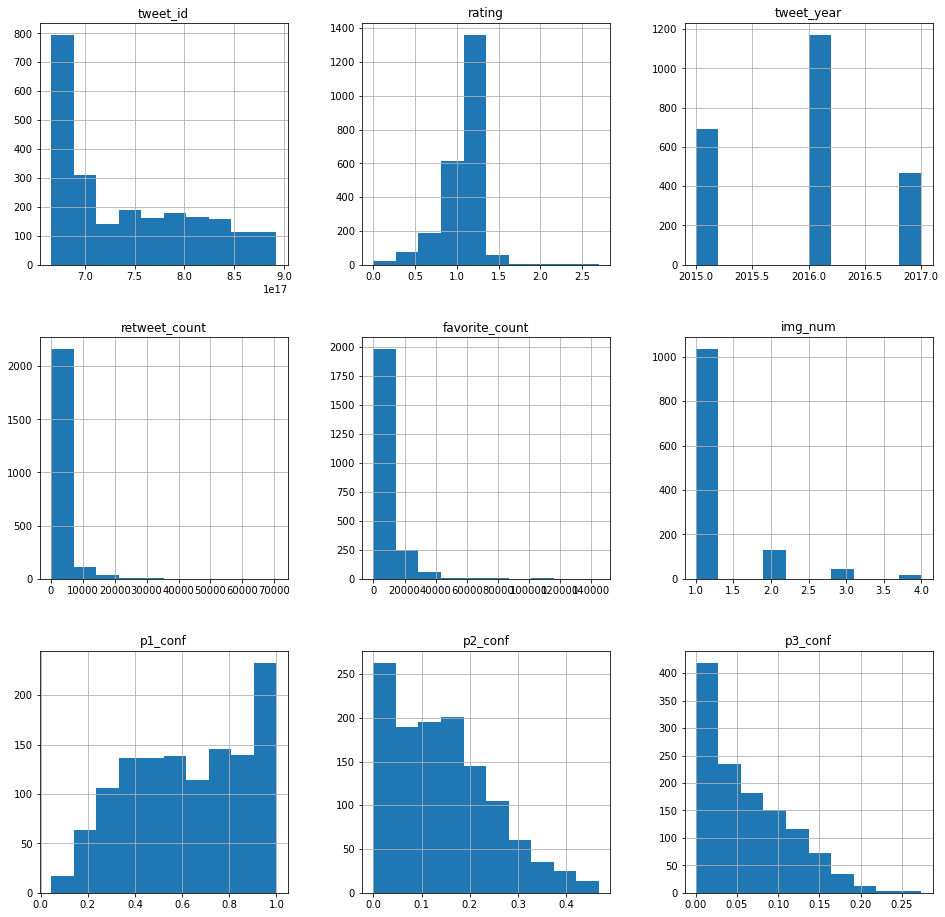

In [6]:
We_rate_dogs_final.hist(figsize=(16,16));

#### Insight 1: 

    Learn which rating has the highest retweet count and favorite count


I will be getting the rating and the corresponding sum of the retweets and favorite count of each associated dog.

In [7]:
We_rate_dogs_insight1 = We_rate_dogs_final.groupby(["rating"],as_index=False)["retweet_count", "favorite_count"].sum()
We_rate_dogs_insight1.sort_values(by=["retweet_count"], ascending = False).head(7)

/tmp/ipykernel_3579/904779934.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  We_rate_dogs_insight1 = We_rate_dogs_final.groupby(["rating"],as_index=False)["retweet_count", "favorite_count"].sum()


,rating,retweet_count,favorite_count
13,1.3,1888481,5601289
12,1.2,1515038,4659641
11,1.1,962155,2499888
10,1.0,604606,1518405
14,1.4,365800,1002910
9,0.9,119422,352191
8,0.8,82971,201068


From the tabular view, the rating with the value 1.3 has the highest retweet_count and favorite_counts.
Lets do a visualization plot to have a clearer view

In [9]:
#function to plot graph with y-axis label
def plot_graph_with_xval(df, x_val, title_val):
    df.plot(kind='bar', x=x_val, title=title_val, figsize=(12,12))
    plt.xlabel(x_val)
    #plt.ylabel(y_val)
    plt.show(block=True);

In [10]:
#function to plot graph with y-axis label
def plot_graph_with_xval_yval(df, x_val, y_val, title_val):
    df.plot(kind='bar', x=x_val, y=y_val, title=title_val, figsize=(12,12))
    plt.ylabel(y_val)
    plt.xlabel(x_val)
    plt.show(block=True);

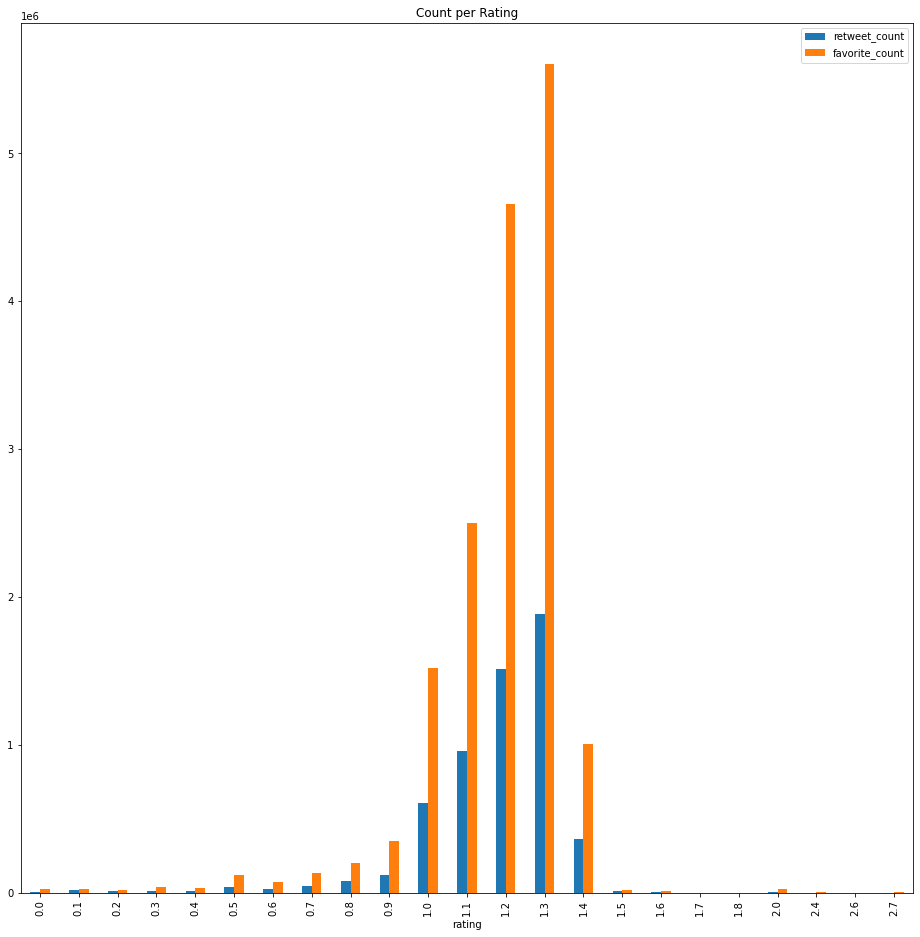

In [27]:
# Call the plot_graph_with_xval to plot the needed graph
plot_graph_with_xval(We_rate_dogs_insight1,'rating', 'Count per Rating')

The visualization shows clearly that 1.3 rating has the highest retweet and favorite counts

#### Insight 2: 
    Learn which dog has the highest rating

I will be getting the dog name and the corresponding sum of the retweets and favorite count of each associated dog.

In [15]:
We_rate_dogs_insight2 = We_rate_dogs_final.groupby(["name"],as_index=False)["retweet_count", "favorite_count"].sum()
We_rate_dogs_insight2.sort_values(by=["retweet_count"], ascending = False).head(7)

/tmp/ipykernel_3579/1115799520.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  We_rate_dogs_insight2 = We_rate_dogs_final.groupby(["name"],as_index=False)["retweet_count", "favorite_count"].sum()


,name,retweet_count,favorite_count
625,none,2089517,5300027
136,buddy,60668,65704
841,sunny,55120,76711
824,stephan,51663,111681
777,seamus,38904,40204
261,duddles,37403,92778
392,hurley,34056,29431


Since 'none' comprises dogs whose name were not captured, we will consider 'buddy' to be the dog with the most retweet count and 'stephan' has the highest favorite count

#### Insight 3: 
    Learn what month has most retweet count and favorite count

I will be getting the tweet_month and the corresponding sum of the retweets and favorite count of each associated dog.

In [7]:
We_rate_dogs_insight3 = We_rate_dogs_final.groupby(["tweet_month"],as_index=False)["retweet_count", "favorite_count"].sum()
We_rate_dogs_insight3.sort_values(by=["retweet_count"], ascending = False).head(5)

/tmp/ipykernel_3784/2222305879.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  We_rate_dogs_insight3 = We_rate_dogs_final.groupby(["tweet_month"],as_index=False)["retweet_count", "favorite_count"].sum()


,tweet_month,retweet_count,favorite_count
2,December,795308,1999699
4,January,758681,1814609
6,June,608686,1990703
5,July,568128,2063657
3,February,485770,1477579


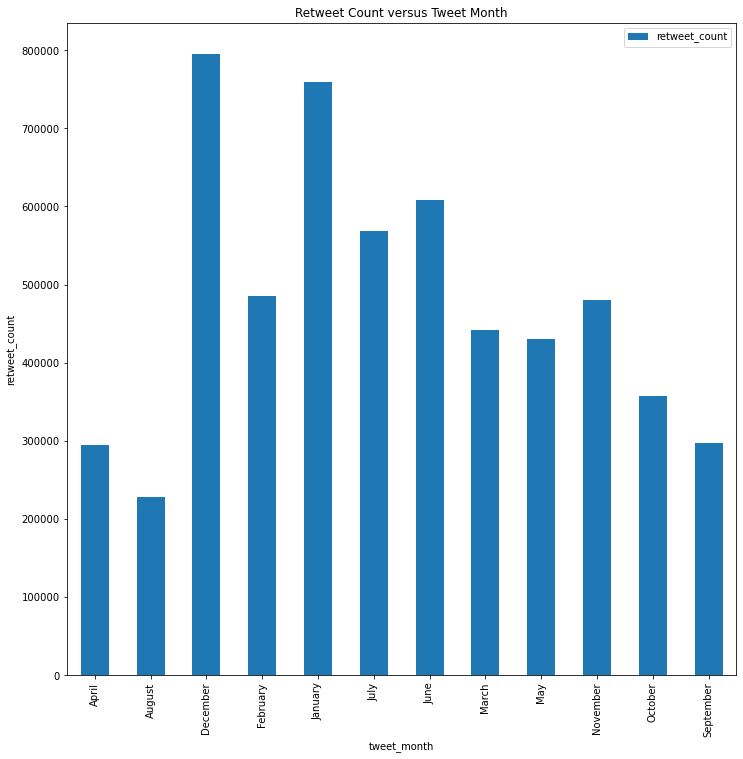

In [11]:
#call plot_graph_with_xval_yval to plot the graph
plot_graph_with_xval_yval(We_rate_dogs_insight3, 'tweet_month', 'retweet_count', 'Retweet Count versus Tweet Month')


From the visualization above, December has the highest retweet count followed by January. The retweet count might be due to the christmas or new year holiday

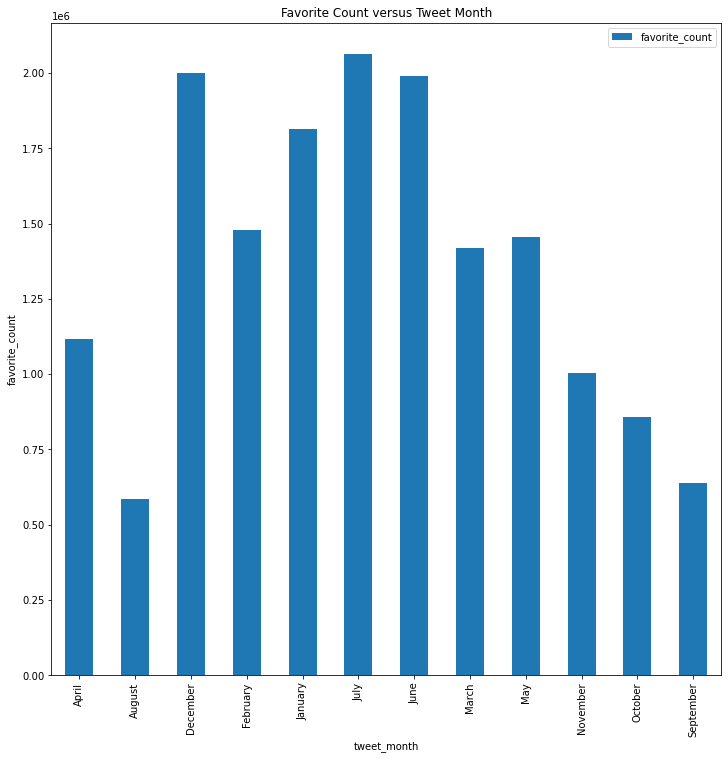

In [39]:
plot_graph_with_xval_yval(We_rate_dogs_insight3, 'tweet_month', 'favorite_count', 'Favorite Count versus Tweet Month')


From the visualization above, July has the highest favorite count followed by December

#### Insight 4: 
    Which prediction has the best confidence level

In [34]:
We_rate_dogs_final.describe()madiv

,tweet_id,rating,tweet_year,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.327000e+03,2323.000000,2327.000000,2327.000000,2327.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,7.417930e+17,1.073181,2015.903739,2470.268156,7053.049420,1.226461,0.626173,0.143554,0.061857
std,6.820795e+16,0.228087,0.697754,4183.405913,10960.362376,0.585374,0.253180,0.103855,0.053140
min,6.660209e+17,0.000000,2015.000000,1.000000,0.000000,1.000000,0.044333,0.000056,0.000008
25%,6.781394e+17,1.000000,2015.000000,494.000000,1224.500000,1.000000,0.414978,0.055919,0.015925
50%,7.178418e+17,1.100000,2016.000000,1148.000000,3051.000000,1.000000,0.627879,0.131007,0.048775
75%,7.986547e+17,1.200000,2016.000000,2860.500000,8603.500000,1.000000,0.853315,0.207230,0.095678
max,8.924206e+17,2.700000,2017.000000,70709.000000,144849.000000,4.000000,0.999885,0.467678,0.273419


On an average (50 percentile) p1_conf has the best confidence value of 0.627879 followed by p2_conf

#### Insight 5: 
    Learn which day has most retweeet count and favorite count

In [33]:
We_rate_dogs_insight5 = We_rate_dogs_final.groupby(["tweet_of_day_of_week"],as_index=False)["retweet_count", "favorite_count"].sum()
We_rate_dogs_insight5.sort_values(by=["retweet_count"], ascending = False).head(5)

/tmp/ipykernel_3579/2003922819.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  We_rate_dogs_insight5 = We_rate_dogs_final.groupby(["tweet_of_day_of_week"],as_index=False)["retweet_count", "favorite_count"].sum()


,tweet_of_day_of_week,retweet_count,favorite_count
6,Wednesday,1018794,2693812
1,Monday,885853,2631188
5,Tuesday,857425,2481202
0,Friday,830125,2240704
4,Thursday,745045,2102115


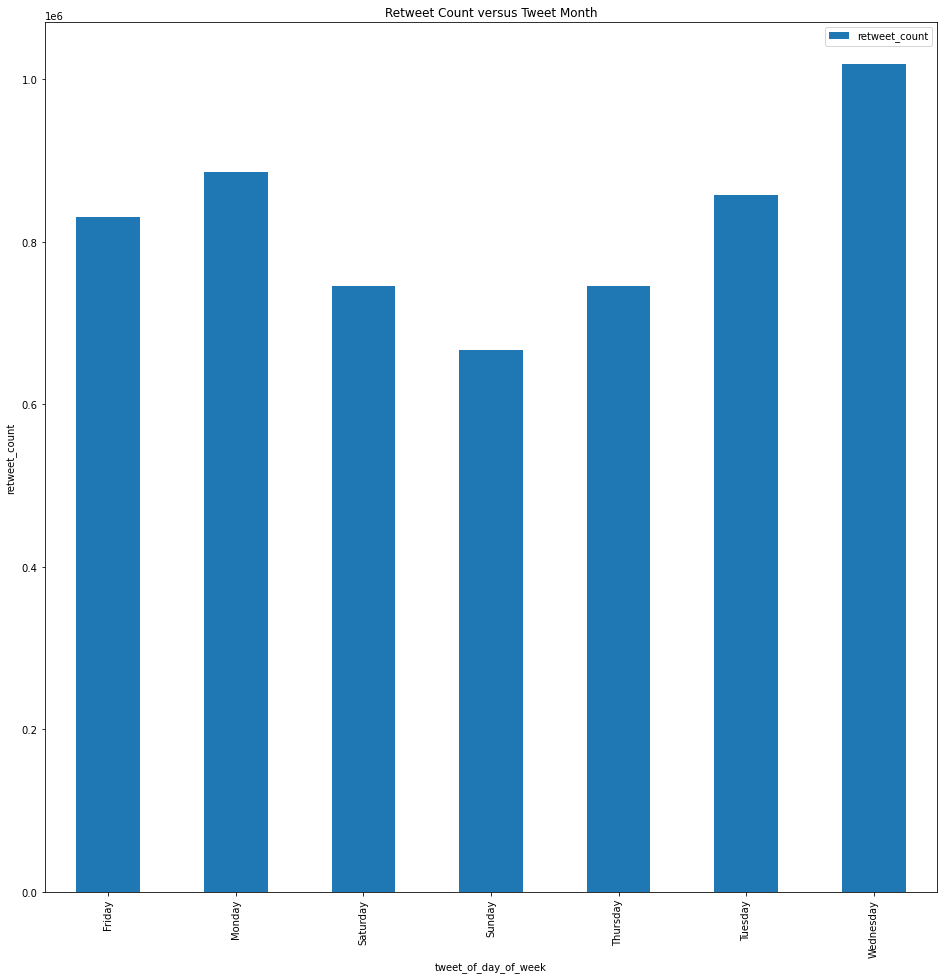

In [34]:
plot_graph_with_xval_yval(We_rate_dogs_insight5, 'tweet_of_day_of_week', 'retweet_count', 'Retweet Count versus Tweet Month')


The visualization above depicts wednesday having the highest retweet count. Naturally, I expected saturday and sunday to have the highest because of weekends but it appears most of the retweet occur on wednesday

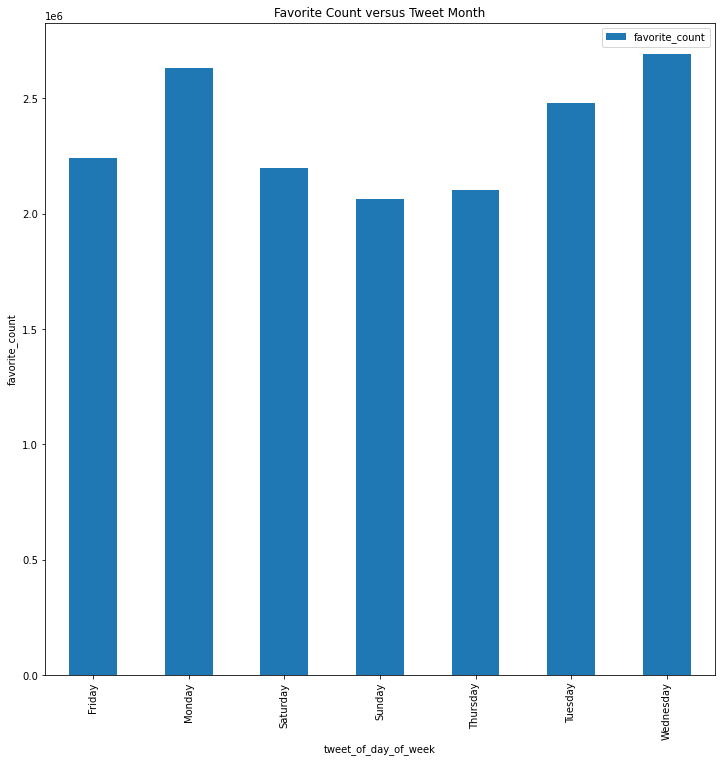

In [41]:

plot_graph_with_xval_yval(We_rate_dogs_insight5, 'tweet_of_day_of_week', 'favorite_count', 'Favorite Count versus Tweet Month')


It shows wednesday having the highest favorite count. 